# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 21s 27ms/step - loss: 0.4317 - accuracy: 0.8596 - val_loss: 0.0546 - val_accuracy: 0.9844
Epoch 2/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 3/5
750/750 [==============================] - 21s 28ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0493 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0364 - val_accuracy: 0.9898


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9914


0.9914000034332275

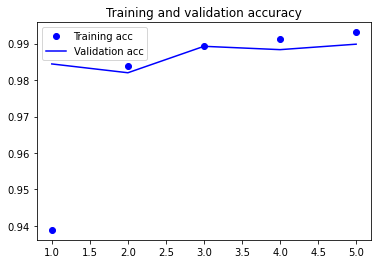

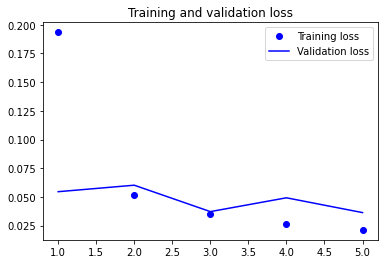

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [10]:
# Write code here
from keras import layers
from keras import models

In [11]:
# Write code here
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='rmsprop', activation='sigmoid'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
#model.summary()

In [12]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)

optimizer = ['SGD', 'RMSprop','Adam']
activation = ['sigmoid', 'tanh']
param_grid = dict(optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(train_images, train_labels)

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='sigmoid'))
#model.add(layers.Dense(10, activation='softmax'))
#model.summary()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/10
938/938 [==============================] - 27s 28ms/step - loss: 0.3187 - accuracy: 0.9071
Epoch 2/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0510 - accuracy: 0.9852
Epoch 3/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 4/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0244 - accuracy: 0.9927
Epoch 5/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0172 - accuracy: 0.9947
Epoch 6/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 7/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 8/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0079 - accuracy: 0.9978
Epoch 9/10
938/938 [==============================] - 27s 28ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 10/10
938/938 [=

In [13]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.988267 using {'activation': 'tanh', 'optimizer': 'RMSprop'}


In [14]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.107200 (0.006468) with: {'activation': 'sigmoid', 'optimizer': 'SGD'}
0.983033 (0.000592) with: {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.985367 (0.000872) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}
0.971600 (0.000756) with: {'activation': 'tanh', 'optimizer': 'SGD'}
0.988267 (0.001447) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.985383 (0.000849) with: {'activation': 'tanh', 'optimizer': 'Adam'}


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [16]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 19s 25ms/step - loss: 1.6803 - accuracy: 0.4084 - val_loss: 0.2841 - val_accuracy: 0.9178
Epoch 2/10
750/750 [==============================] - 23s 30ms/step - loss: 0.2447 - accuracy: 0.9294 - val_loss: 0.1330 - val_accuracy: 0.9607
Epoch 3/10
750/750 [==============================] - 21s 29ms/step - loss: 0.1295 - accuracy: 0.9612 - val_loss: 0.0976 - val_accuracy: 0.9704
Epoch 4/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0878 - accuracy: 0.9730 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 5/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0679 - accuracy: 0.9788 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 6/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0587 - val_accuracy: 0.9827
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.0549 - val_accuracy:

In [17]:
import pandas as pd

summary = pd.DataFrame(model.history.history)

<AxesSubplot:>

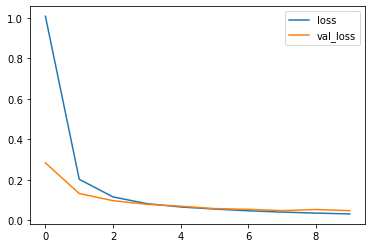

In [18]:
summary[['loss','val_loss']].plot()

<AxesSubplot:>

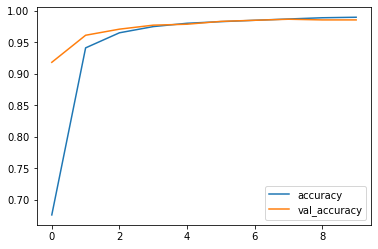

In [20]:
summary[['accuracy','val_accuracy']].plot()

In [21]:
#from keras.datasets import mnist
#from keras.utils import to_categorical

In [22]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [23]:
#model.compile(optimizer='sgd', 
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])
#history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

In [24]:
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#test_acc

In [25]:
#from sklearn.model_selection import GridSearchCV, KFold
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
#import sys

#def create_model(learn_rate, dropout_rate):
#       model = Sequential()
#    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(4, input_dim=8, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(1, activation='sigmoid'))
#    adam = Adam(lr=learn_rate)
#    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#    return model
#classifier = KerasClassifier(build_fn = create_model, verbose=1) 

In [ ]:
#learn_rate = [0.001, 0.02, 0.2]
#dropout_rate = [0.0, 0.2, 0.4]
#batch_size = [10, 20, 30]
#epochs = [1, 5, 10]

#seed = 42
#param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate, batch_size=batch_size, epochs=epochs )
#grid = GridSearchCV(estimator=model, param_grid=param_grid,
#                    cv=KFold(random_state=seed), verbose=10)
#grid_results = grid.fit(X, Y)
#print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
#means = grid_results.cv_results_['mean_test_score']
#stds = grid_results.cv_results_['std_test_score']
#params = grid_results.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print('{0} ({1}) with: {2}'.format(mean, stdev, param))